In [1]:
import pandas as pd
import psycopg2 as pg
import csv as c
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import mysql as sq
import os

In [2]:

list1 = pd.read_csv("data/spreadspoke_scores.csv")
Shape= list1.shape
print(Shape)
list2= list1.drop(['schedule_date',
          'stadium','stadium_neutral','weather_temperature',
          'weather_wind_mph','weather_humidity','weather_detail'],axis=1)
list3 = pd.DataFrame(list2)
list3.rename(columns ={'schedule_week': 'Game','schedule_season':'Year', 'over_under_line': 'OverUnder'
                       ,'spread_favorite': 'Spread', 'schedule_playoff': 'PostSeason'
                       , 'team_home': 'Home_Team', 'score_home':'Home_Score'
                       ,'score_away':'Away_Score','team_away': 'Away_Team'
                       ,'team_favorite_id':'Odds_Favorite'  }, inplace = True)
list4 = list3.dropna()
list5 = list4[list4['Year']>1990]
list6 = list5[list5['Game']== 'Superbowl']            
shape = list6.shape
print(shape)
print(list6)

  



(13788, 17)
(32, 10)
       Year       Game  PostSeason             Home_Team  Home_Score  \
5385   1991  Superbowl        True   Washington Redskins        37.0   
5620   1992  Superbowl        True        Dallas Cowboys        52.0   
5855   1993  Superbowl        True        Dallas Cowboys        30.0   
6090   1994  Superbowl        True   San Francisco 49ers        49.0   
6341   1995  Superbowl        True        Dallas Cowboys        27.0   
6592   1996  Superbowl        True     Green Bay Packers        35.0   
6843   1997  Superbowl        True     Green Bay Packers        24.0   
7094   1998  Superbowl        True        Denver Broncos        34.0   
7353   1999  Superbowl        True        St. Louis Rams        23.0   
7612   2000  Superbowl        True      Baltimore Ravens        34.0   
7871   2001  Superbowl        True        St. Louis Rams        17.0   
8138   2002  Superbowl        True       Oakland Raiders        21.0   
8405   2003  Superbowl        True  New Eng

In [9]:
spread_df= list6.loc[:, ['Year', 'Spread']]
spread = (list6['Spread'] == list6['Spread'].max()) | (list6['Spread'] == list6['Spread'].min())
print(f'\n{spread_df[spread]}')

overunder_df= list6.loc[:, ['Year', 'OverUnder']]
overunder= (list6['OverUnder'] == list6['OverUnder'].max()) | (list6['OverUnder'] == list6['OverUnder'].min())
print(f'\n{overunder_df[overunder]}')

home_df= list6.loc[:, ['Year', 'Home_Score']]
home = (list6['Home_Score'] == list6['Home_Score'].max()) | (list6['Home_Score'] == list6['Home_Score'].min())
print(f'\n{home_df[home]}')

away_df= list6.loc[:, ['Year', 'Away_Score']]
away = (list6['Away_Score'] == list6['Away_Score'].max()) | (list6['Away_Score'] == list6['Away_Score'].min()) 
print(f'\n{away_df[away]}')



       Year  Spread
6090   1994   -18.5
11342  2014    -1.0
13515  2022    -1.0

       Year OverUnder
7612   2000        33
11876  2016      57.5

       Year  Home_Score
5620   1992        52.0
12410  2018         3.0

      Year  Away_Score
7612  2000         7.0
8138  2002        48.0


<Axes: xlabel='Year'>

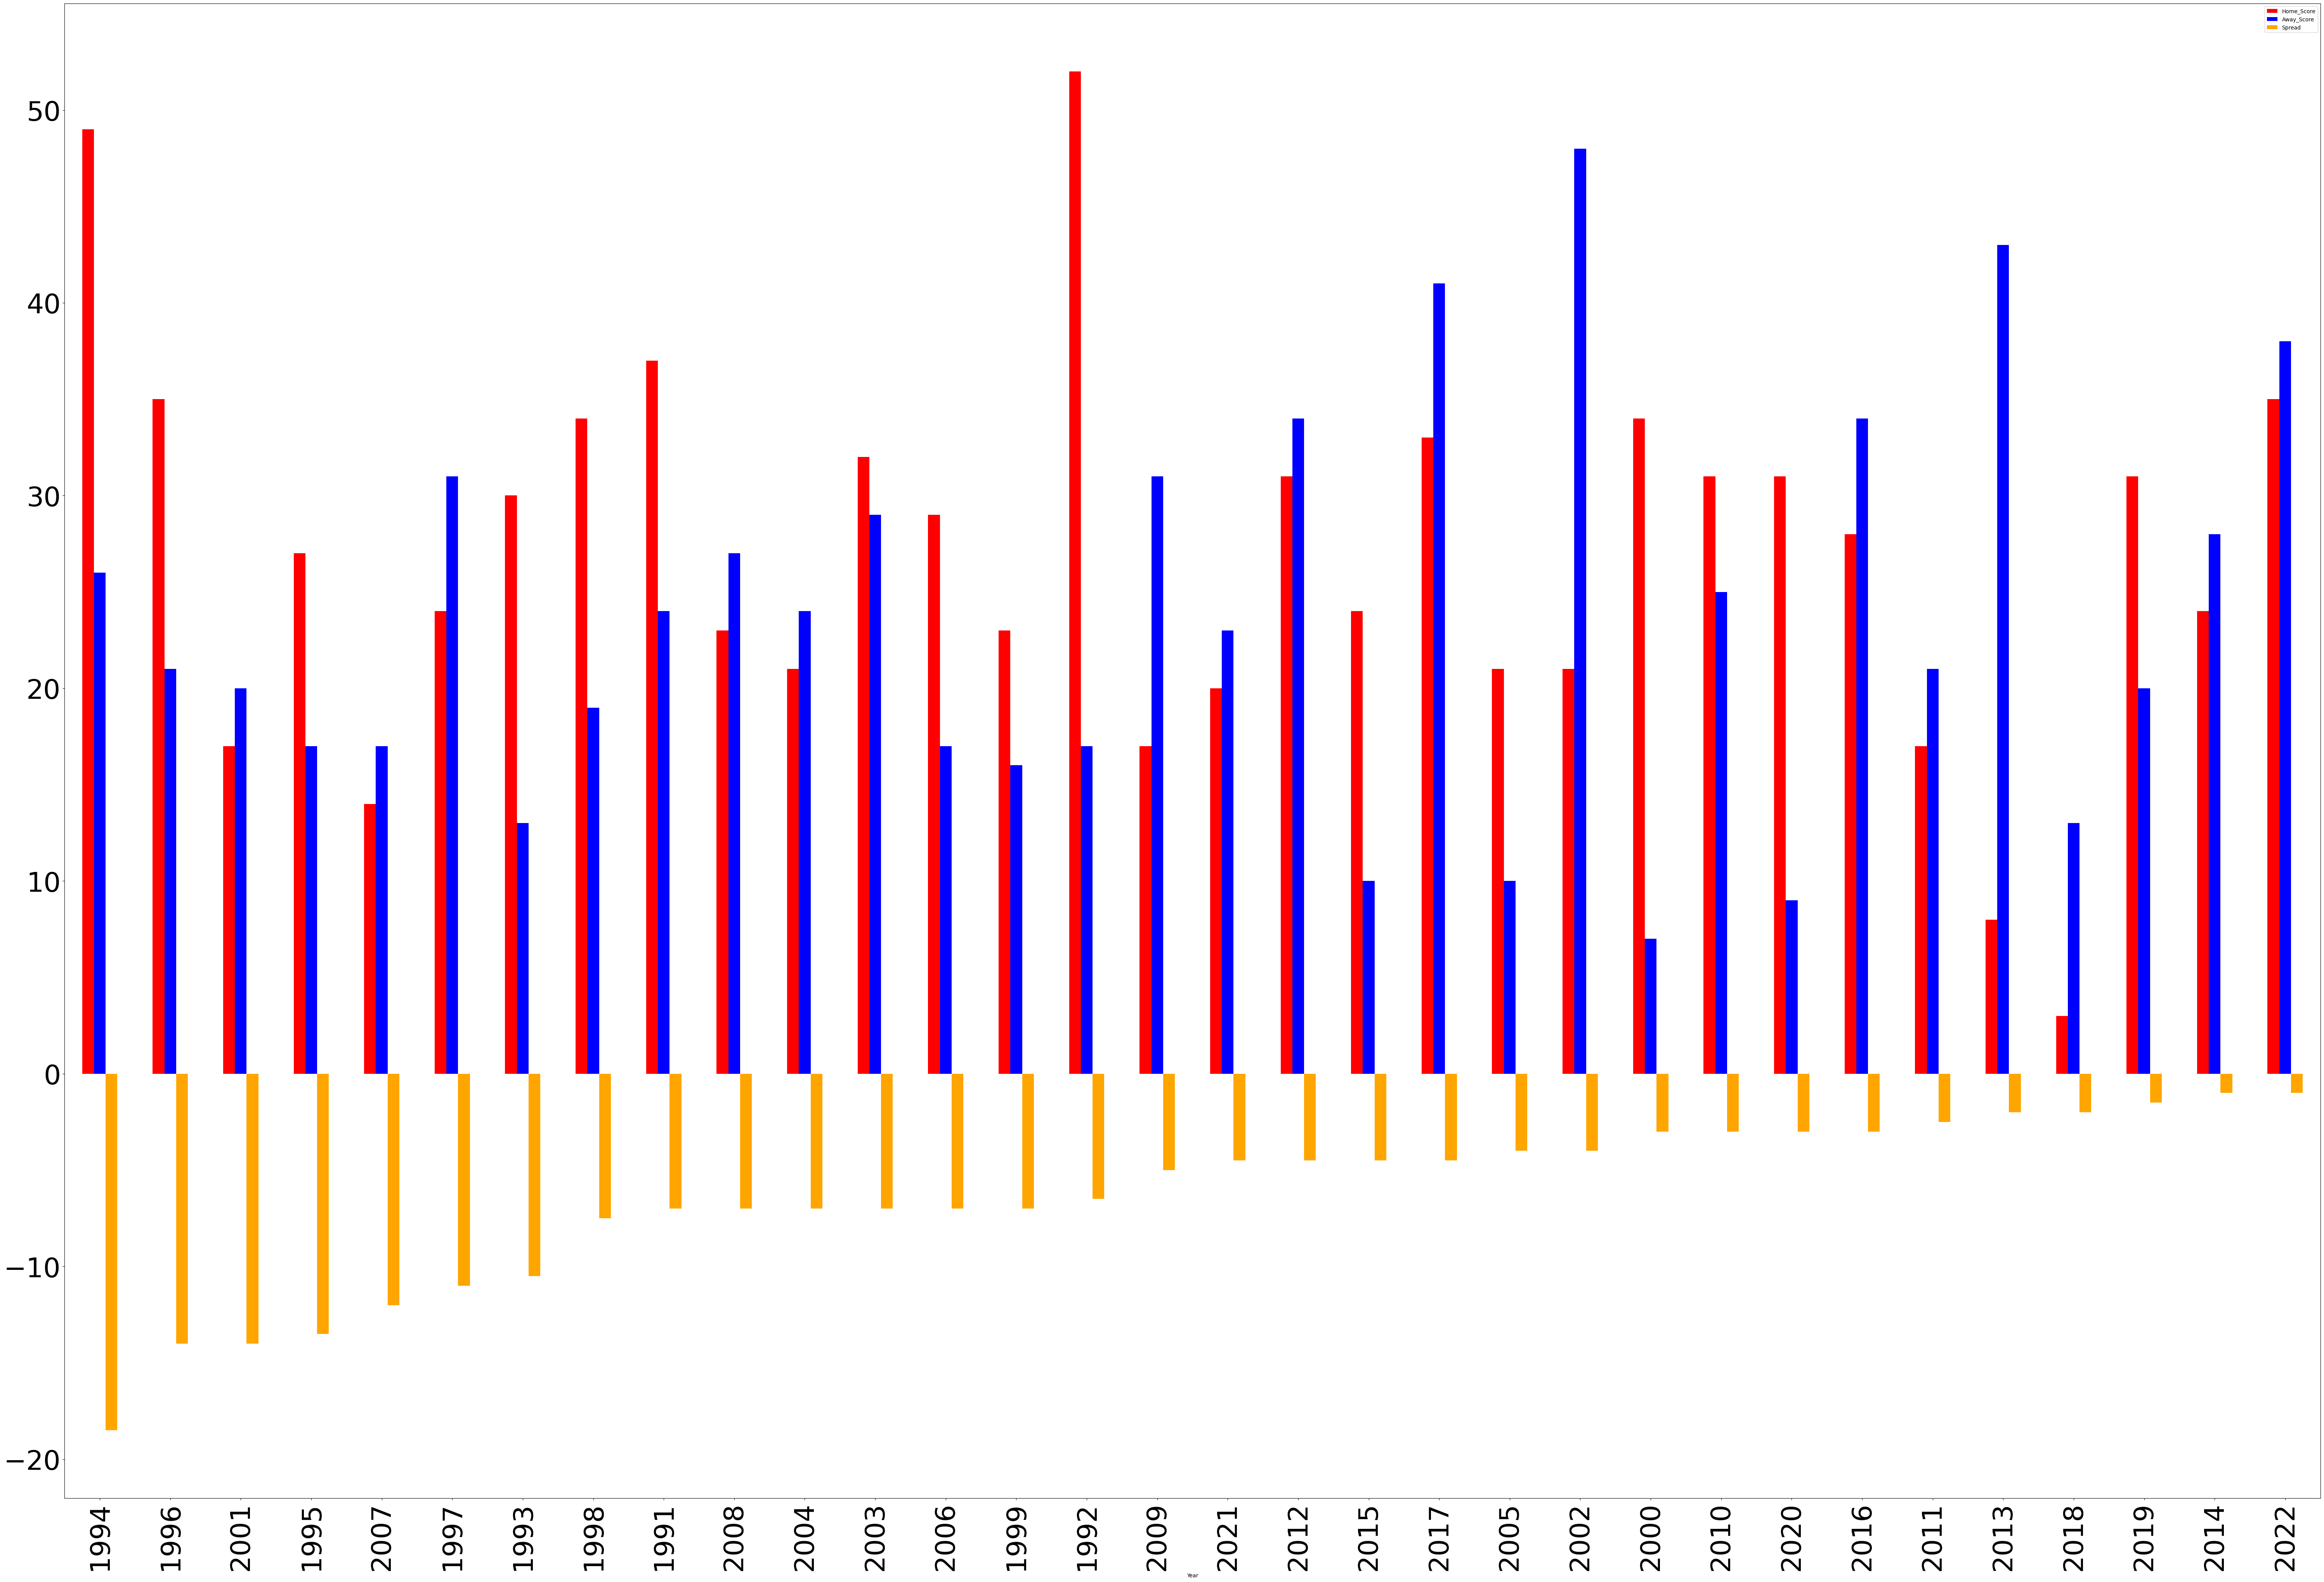

In [23]:

list7 =list6.sort_values(by="Spread", ascending=True)
list7.plot(x="Year", kind="bar", color=['red', 'blue','orange'],rot=90, fontsize='50',figsize = (75,50))



In [39]:
x= list6['Home_Score']
y= list6['Away_Score']
s= list6['Spread']
o= list6['Odds_Favorite']
cont= (x+y)
cont.median()
s.median()
x.mean()

26.75

<Axes: >

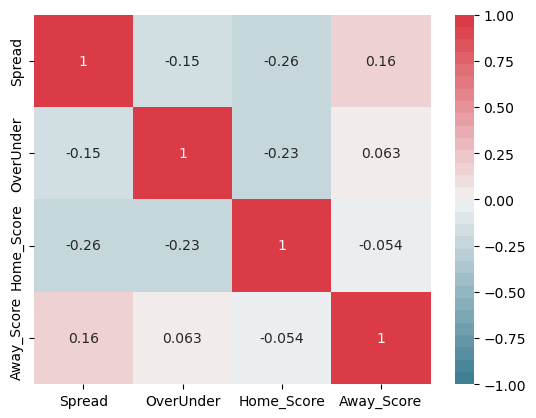

In [6]:
spreads_df =list7.loc[:,['Spread', 'OverUnder', 'Home_Score', 'Away_Score']]
sns.heatmap(spreads_df.corr(), annot=True, cmap=sns.diverging_palette(220,10,sep=1,n=30),vmin=-1,vmax=1)

<Axes: xlabel='Away_Score', ylabel='Count'>

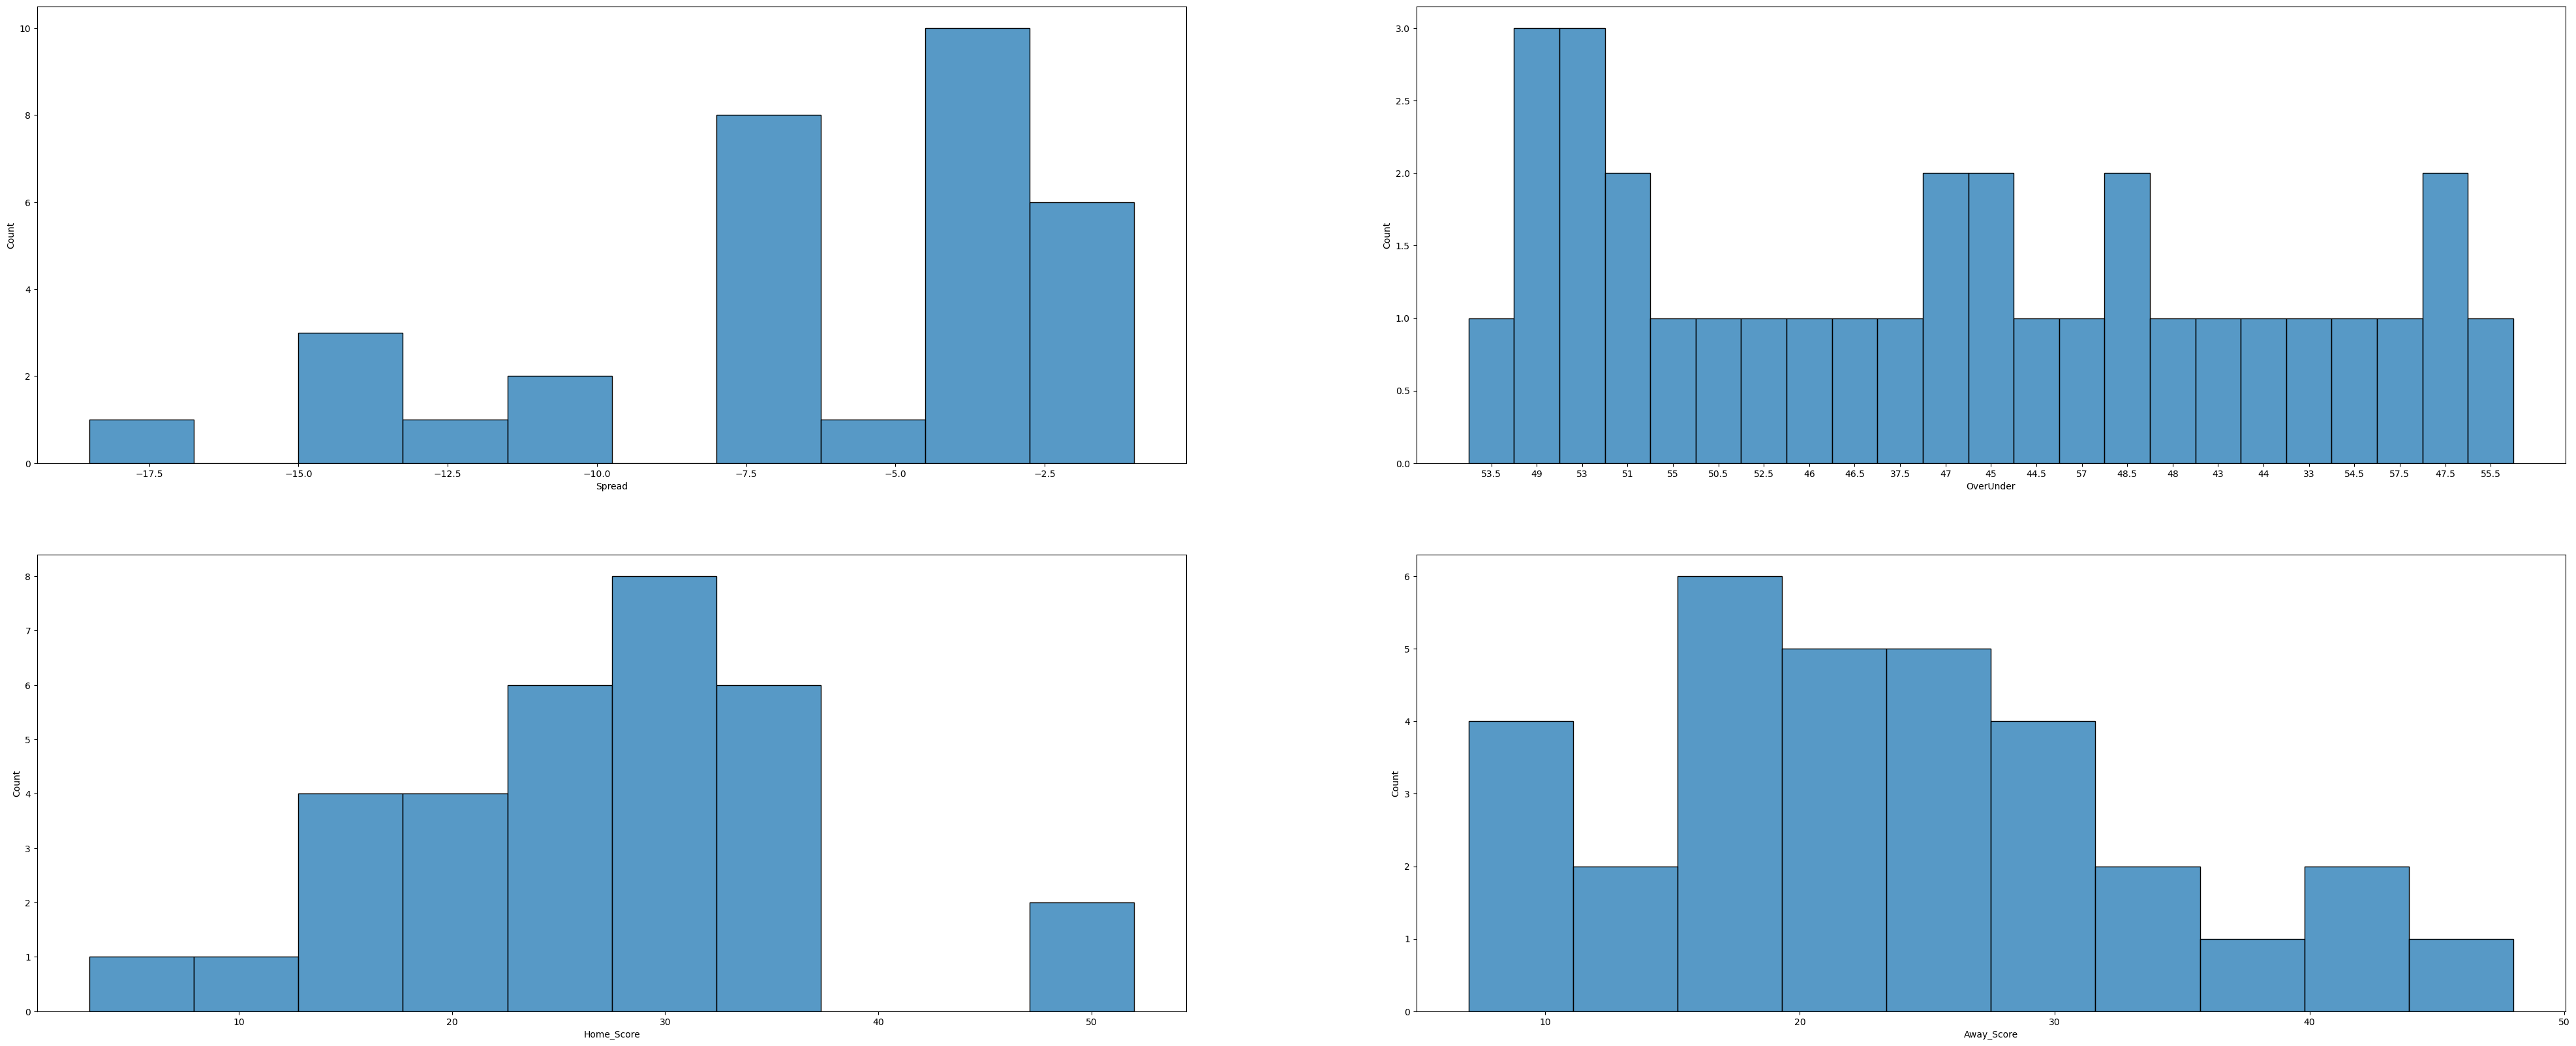

In [33]:
fig, ax = plt.subplots(2,2, figsize=(50, 20))

sns.histplot(list7['Spread'], bins=10, kde=False, ax = ax[0,0])
sns.histplot(list7['OverUnder'], bins=10, kde=False, ax = ax[0,1])
sns.histplot(list7['Home_Score'], bins=10, kde=False, ax = ax[1,0])
sns.histplot(list7['Away_Score'], bins=10, kde=False, ax = ax[1,1])


<Axes: >

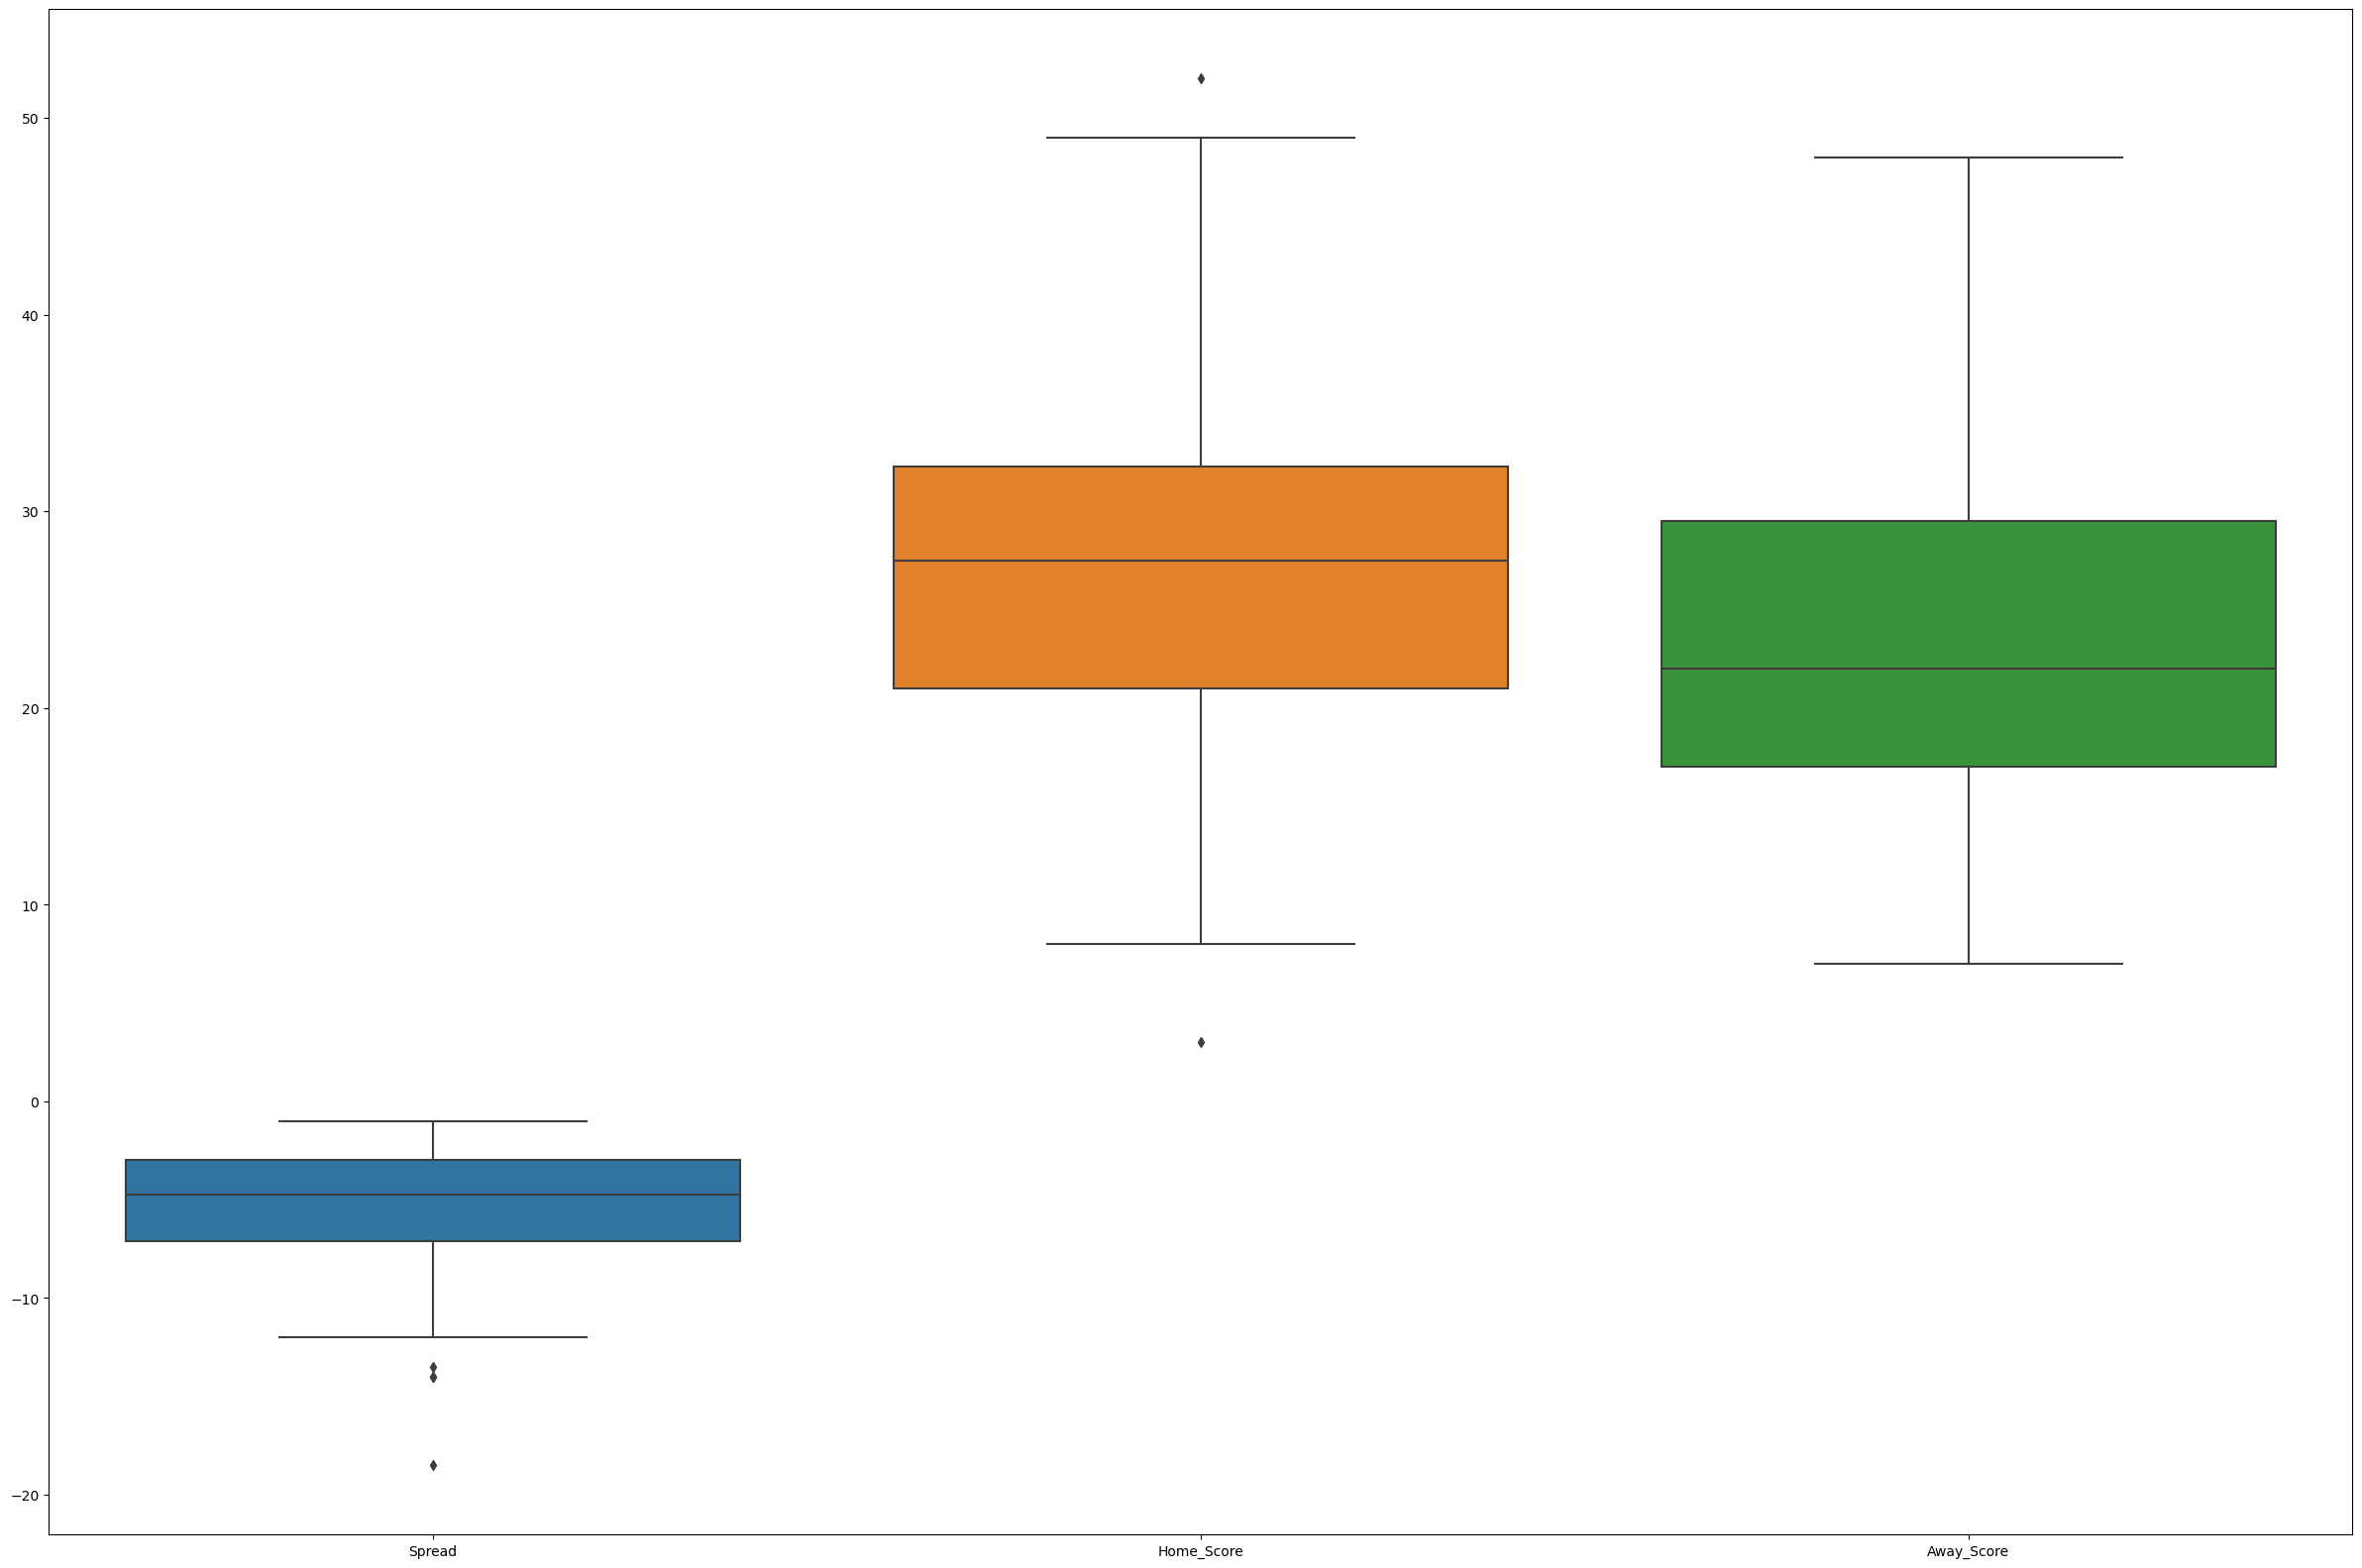

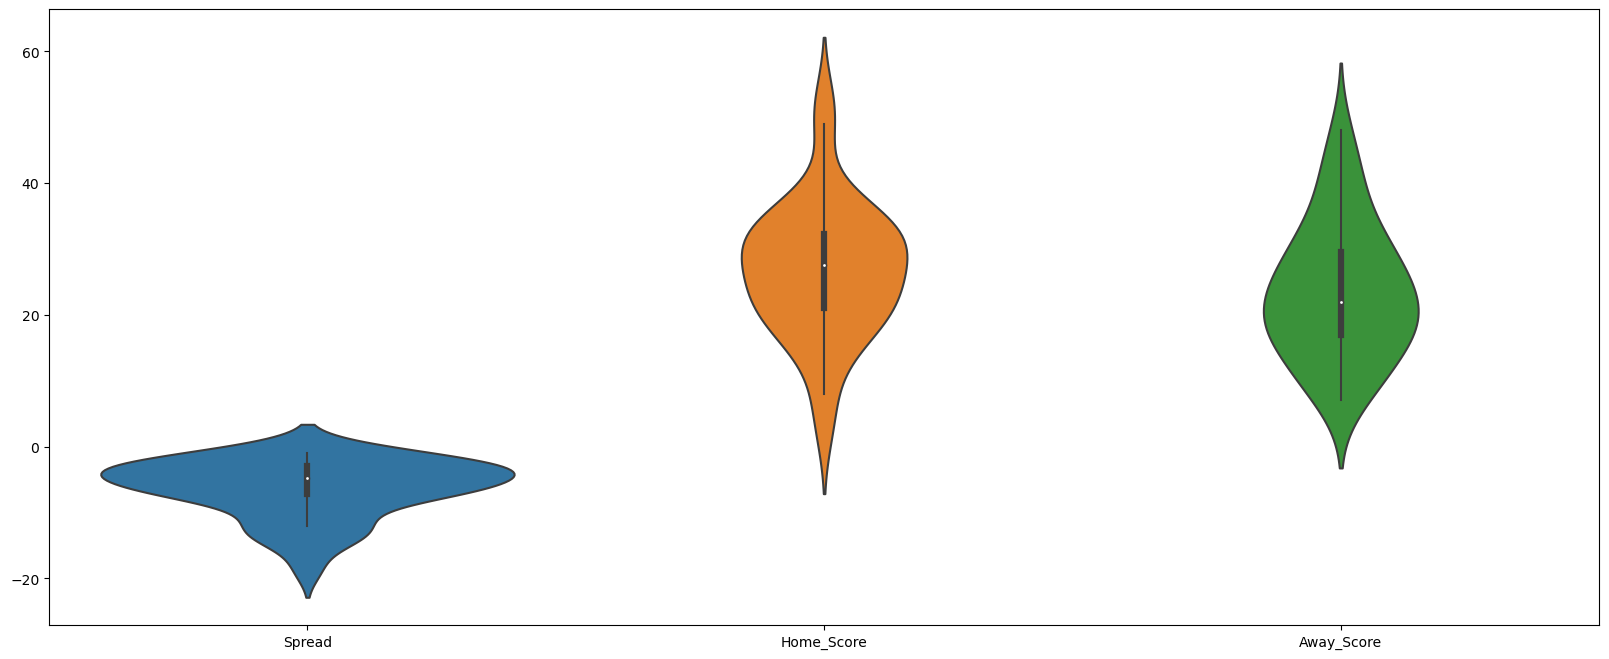

In [8]:
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(list7.loc[:, ['Spread','Home_Score','Away_Score','OverUnder']])
fig, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(list7.loc[:,['Spread','OverUnder', 'Home_Score', 'Away_Score']])